In [126]:
import pandas as pd
df = pd.read_csv("table1.csv")

import numpy as np
import matplotlib.pyplot as plt

In [127]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,"3,724","7,350","0,451","50,500","0,718","0,168","0,882","0,414","0,258"
1,Afghanistan,2009,"4,402","7,509","0,552","50,800","0,679","0,191","0,850","0,481","0,237"
2,Afghanistan,2010,"4,758","7,614","0,539","51,100","0,600","0,121","0,707","0,517","0,275"
3,Afghanistan,2011,"3,832","7,581","0,521","51,400","0,496","0,164","0,731","0,480","0,267"
4,Afghanistan,2012,"3,783","7,661","0,521","51,700","0,531","0,238","0,776","0,614","0,268"
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,"3,616","7,783","0,775","52,625","0,763","-0,051","0,844","0,658","0,212"
2195,Zimbabwe,2019,"2,694","7,698","0,759","53,100","0,632","-0,047","0,831","0,658","0,235"
2196,Zimbabwe,2020,"3,160","7,596","0,717","53,575","0,643","0,006","0,789","0,661","0,346"
2197,Zimbabwe,2021,"3,155","7,657","0,685","54,050","0,668","-0,076","0,757","0,610","0,242"


In [128]:
df.dtypes

Country name                        object
year                                 int64
Life Ladder                         object
Log GDP per capita                  object
Social support                      object
Healthy life expectancy at birth    object
Freedom to make life choices        object
Generosity                          object
Perceptions of corruption           object
Positive affect                     object
Negative affect                     object
dtype: object

On constate que la plupart des colonnes ne sont pas du type "float" alors qu'on en aurait besoin pour les analyses. On va donc rendre le dataframe "plus propre" en changeant les types en float. Mais pour cela, il faut changer les virgules entre partie entière et partie décimale en points.

Remarque : nous avons plus tard compris qu'en téléchargeant le fichier d'origine directement sous la forme d'un xls, alors le problème de virgule ainsi que de type d'apparaît pas. C'est ce que montrent les deux cellules suivantes.

In [129]:
df2 = pd.read_excel("DataForTable2.1WHR2023.xls")

In [130]:
df2.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

Cependant, nous allons revenir à df et le "nettoyer" manuellement, car c'est ainsi que nous avons commencé à travailler.

In [131]:
# Nettoyage du dataframe
for c in df.columns[2:]:
    df[c] = df[c].str.replace(',', '.').astype(float)

In [132]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [134]:
df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

On constate qu'on a bien les types recherchés.

A présent, nous choisissons ici de tracer l'évolution du critère "Life Ladder" en fonction du temps, et ce dans différents pays. D'après le "Statistical Appendix for “World happiness, trust and social connections in times of crisis,” Chapitre 2, le Life Ladder correspond au positionnement sur une échelle de 1 à 10 : 1 représente la pire vie pour soi, et 10 la meilleure.


In [142]:
# On regarde quels sont les pays présents dans la base de donnée
pays = df["Country name"].unique()

# On définit une fonction qui trace ce que l'on souhaite.

def evol_life_ladder(pays): #pays est un str
    mask = df["Country name"] == pays
    df_pays = df.loc[mask]
    # df_pays ne contient que les lignes du pays considéré.
    plt.plot(df_pays["year"],df_pays["Life Ladder"] )
    plt.title(f"Evolution de Life Ladder de {pays} avec le temps")
    plt.xlabel("temps en année")
    plt.ylabel("Life Ladder")
    plt.legend

Remarque : Dans l'implémentation de la fonction, nous avons utilisé un masque. Cependant, il aurait été possible d'utiliser un groupby à la place, en écrivant à la place des deux premières lignes de la fonction :

In [ ]:
df.groupby(by="Country name")["Life Ladder"]

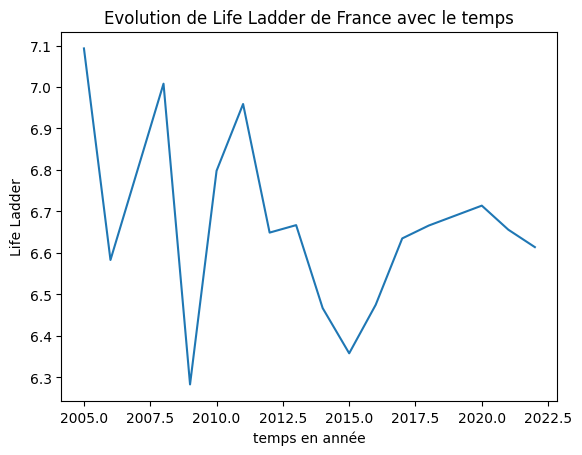

In [143]:
# Prenons l'exemple de la France
evol_life_ladder('France')

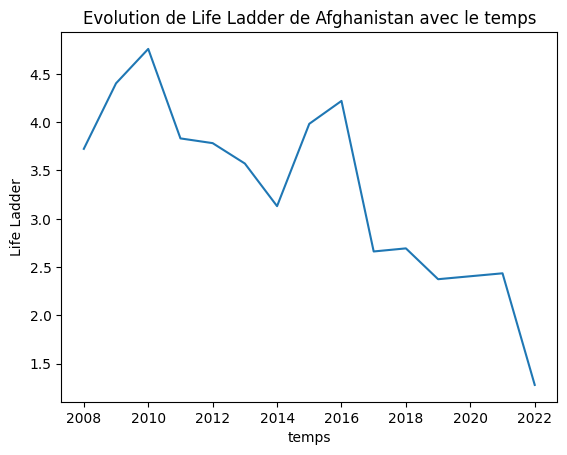

In [137]:
# Puis de l'Afghanistan
evol_life_ladder("Afghanistan")

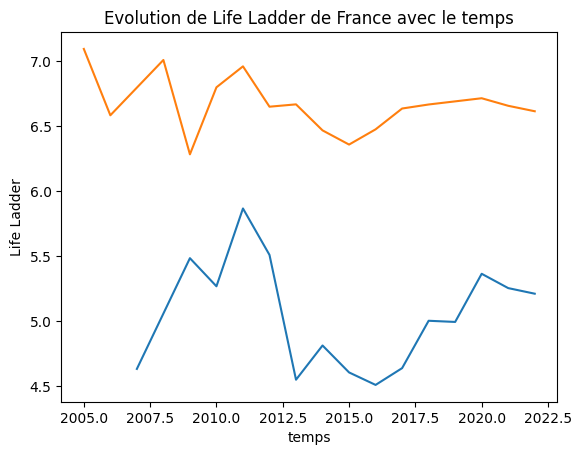

In [139]:
evol_life_ladder("Albania")
evol_life_ladder("France")